In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def single_peak_lorentzian(x, amplitude, center, width, constant=1):
    """
    Calculate a single peak Lorentzian function.

    Parameters:
    x (array-like): The input values where the Lorentzian function is evaluated.
    amplitude (float): The height of the peak.
    center (float): The position of the center of the peak.
    width (float): The width of the peak.
    constant (float): A constant offset added to the Lorentzian function.

    Returns:
    array-like: The calculated Lorentzian values at each point in x.
    """
    return amplitude * (width**2 / ((x - center)**2 + width**2)) + constant

def multi_peak_lorentzian(x, amplitudes, centers, widths, constant=1):
    """
    Calculate a sum of multiple Lorentzian peaks.

    Parameters:
    x (array-like): The input values where the Lorentzian function is evaluated.
    amplitudes (array-like): The heights of the peaks.
    centers (array-like): The positions of the centers of the peaks.
    widths (array-like): The widths of the peaks.
    constant (float): A constant offset added to the Lorentzian function.

    Returns:
    array-like: The calculated Lorentzian values at each point in x.
    """
    result = constant * np.ones_like(x)
    for amplitude, center, width in zip(amplitudes, centers, widths):
        result += single_peak_lorentzian(x, amplitude, center, width, constant=0)
    return result

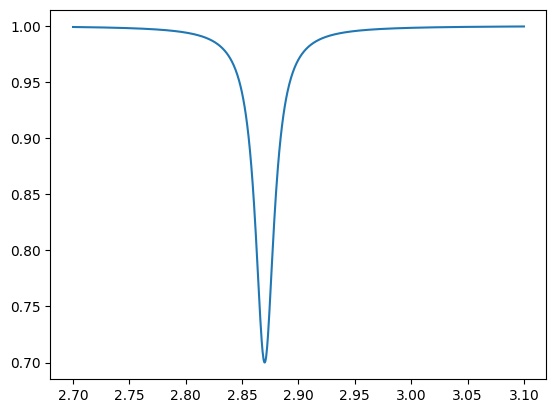

In [30]:
amp = -0.3
center = 2.87
width = 0.01

x = np.linspace(2.7, 3.1, 1000)

plt.plot(x, single_peak_lorentzian(x, amp, center, width), label='Single Peak Lorentzian')
plt.show()

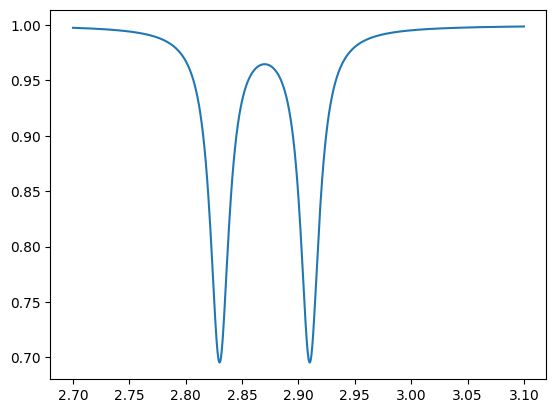

In [32]:
amps = [-.3, -.3]
centers = [2.83, 2.91]
width = [0.01, 0.01]

plt.plot(x, multi_peak_lorentzian(x, amps, centers, width), label='Multi Peak Lorentzian')

## ESR Frequencies

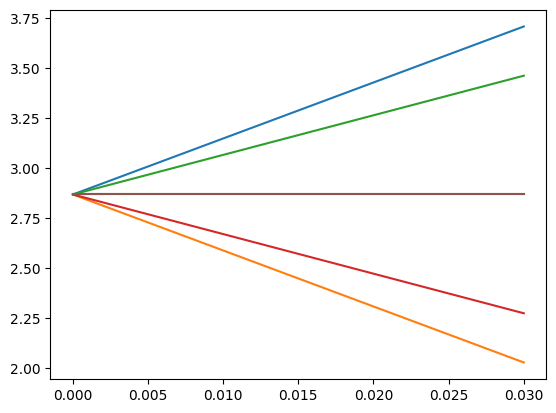

In [18]:
D = 2.87
g = 28



def fl(B, theta):
    return D - g*B * np.cos(np.radians(theta))

def fu(B, theta):
    return D + g*B * np.cos(np.radians(theta))


B = np.linspace(0, 0.03, 1000)

for theta in [0, 45, 90]:
    plt.plot(B, fu(B, theta), label=f'fu(B, theta={theta})')
    plt.plot(B, fl(B, theta), label=f'fl(B, theta={theta})')

plt.show()